<a href="https://colab.research.google.com/github/roshnijohnson/Linear-Regression-using-Gradient-Descent/blob/main/part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 6375 Assignment-1 Part-2 using in-built libraries

Name of students:

Vaibhav Tyagi - VXT200018

Roshni Johnson Nambiaparambil - RXN200022

In [ ]:
# Imported libraries

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# reading dataset from UCI

df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx")
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
# Checking dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
#  Removing the 'No' column

df = df.drop('No', 1)
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
# checking for null values

df.isna().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [ ]:
# Converting feature 'Transaction date' to type int

df['X1 transaction date'] = df['X1 transaction date'].astype(int)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
# Calculating the Correlation

df.corr()["Y house price of unit area"][:-1:].sort_values(ascending=False)

X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.081545
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64

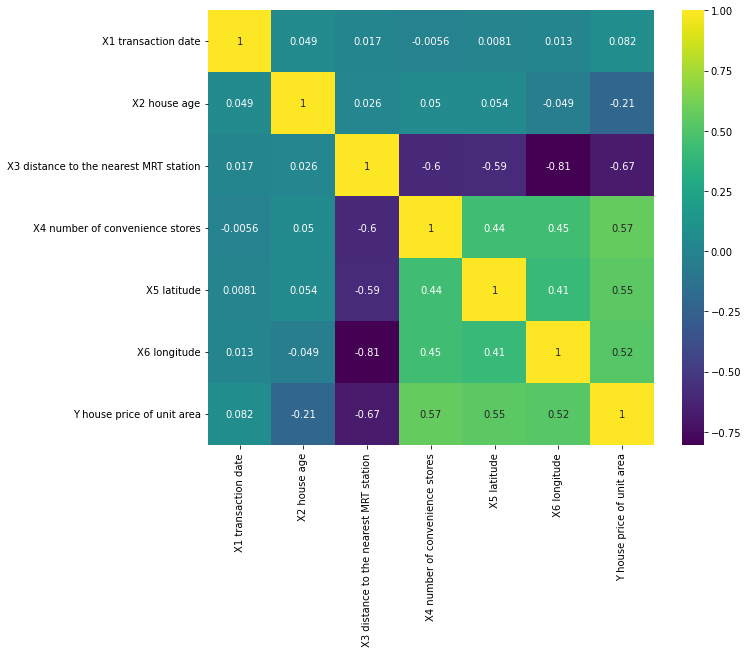

In [ ]:
# Plotting correlation graph

plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), annot=True, cmap="viridis")

In [ ]:
# Splitting X (attributes) and Y (Output)  

X = df.iloc[:,:-1]
X

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012,32.0,84.87882,10,24.98298,121.54024
1,2012,19.5,306.59470,9,24.98034,121.53951
2,2013,13.3,561.98450,5,24.98746,121.54391
3,2013,13.3,561.98450,5,24.98746,121.54391
4,2012,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013,13.7,4082.01500,0,24.94155,121.50381
410,2012,5.6,90.45606,9,24.97433,121.54310
411,2013,18.8,390.96960,7,24.97923,121.53986
412,2013,8.1,104.81010,5,24.96674,121.54067


In [ ]:
Y = df.iloc[:,-1:]
Y[:5]

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


In [ ]:
# Splitting Train and Test data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
# Normalizing the X_train and X_test

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
# Variables to store results for multiple iteration results on test and training data

learning_rate = np.arange(0.01,0.1,0.01)
epochs = np.arange(4000,10000,1000)
train_score = {}
test_score = {}
coef = {}
intercept={}

train_y_pred_vals = {}
train_r2 = {}
train_mse = {}

test_y_pred_vals = {}
test_r2 = {}
test_mse = {}


for learn_rate in learning_rate:
  for epoch in epochs:
    
    # defining SGDRegressor
    SGD = SGDRegressor(eta0=np.round(learn_rate,2),learning_rate='constant',max_iter=epoch).fit(X_train,Y_train.values.ravel())

    # Storing the coefficients and Intercepts
    coef[(np.round(learn_rate,2),epoch)] = SGD.coef_ # Coefs
    intercept[(np.round(learn_rate,2),epoch)]= SGD.intercept_ # intercepts

    # predicting the output on training data

    y_pred = SGD.predict(X_train)
    train_y_pred_vals[(np.round(learn_rate,2),epoch)] = y_pred

    train_score[(np.round(learn_rate,2),epoch)] = SGD.score(X_train,Y_train) * 100 # model score on training data

    train_mse[(np.round(learn_rate,2),epoch)] = mean_squared_error(Y_train, y_pred) # Should be as low as possible
    train_r2[(np.round(learn_rate,2),epoch)] = r2_score(Y_train, y_pred) * 100 # Should be as high as possible

    

    # predicting the output on training data

    y_pred = SGD.predict(X_test)
    test_y_pred_vals[(np.round(learn_rate,2),epoch)] = y_pred

    test_score[(np.round(learn_rate,2),epoch)] = SGD.score(X_test, Y_test) * 100 #model score on training data (generalization score)

    test_mse[(np.round(learn_rate,2),epoch)] = mean_squared_error(Y_test, y_pred) # Should be as low as possible
    test_r2[(np.round(learn_rate,2),epoch)] = r2_score(Y_test, y_pred) * 100 # Should be as high as possible



In [ ]:
# Calculating Best value Cost, R2_Score and MSE for training dataset

print("Minimum Score Value on Training Data: ",max(train_score.values()))
print("Maximum R2-Score Value on Training Data: ",max(train_r2.values()))
print("Minimum MSE Value on Training Data: ",min(train_mse.values()))

Minimum Score Value on Training Data:  55.13582466789584
Maximum R2-Score Value on Training Data:  55.13582466789584
Minimum MSE Value on Training Data:  84.38525280660795


In [ ]:
# Calculating Best value Cost, R2_Score and MSE for testing dataset

print("Minimum Score Value on Testing Data: ",max(test_score.values()))
print("Maximum R2-Score Value on Testing Data: ",max(test_r2.values()))
print("Minimum MSE Value on Testing Data: ",min(test_mse.values()))

Minimum Score Value on Testing Data:  69.28662493586087
Maximum R2-Score Value on Testing Data:  69.28662493586087
Minimum MSE Value on Testing Data:  51.52467954114587


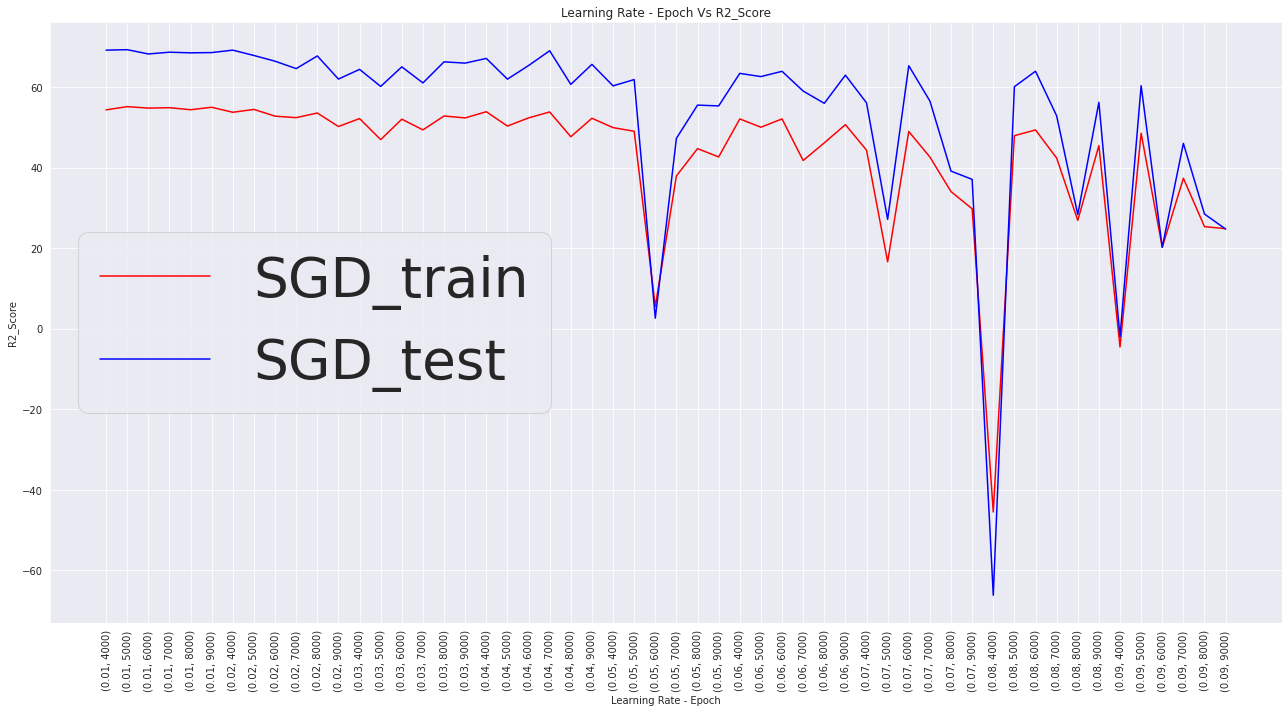

In [ ]:

sns.set_style("darkgrid")

plt.figure(figsize=(18,10))
plt.plot(np.arange(len(learning_rate) * len(epochs)),list(train_score.values()), color="red", label="SGD_train")
plt.plot(np.arange(len(learning_rate) * len(epochs)),list(test_score.values()), color="blue", label="SGD_test")
plt.xticks(np.arange(len(learning_rate) * len(epochs)),labels=train_score.keys(),rotation ='vertical')

plt.title("Learning Rate - Epoch Vs R2_Score")

plt.xlabel("Learning Rate - Epoch")
plt.ylabel("R2_Score")
plt.legend(loc="center left", fontsize=55)
plt.tight_layout()
plt.draw()

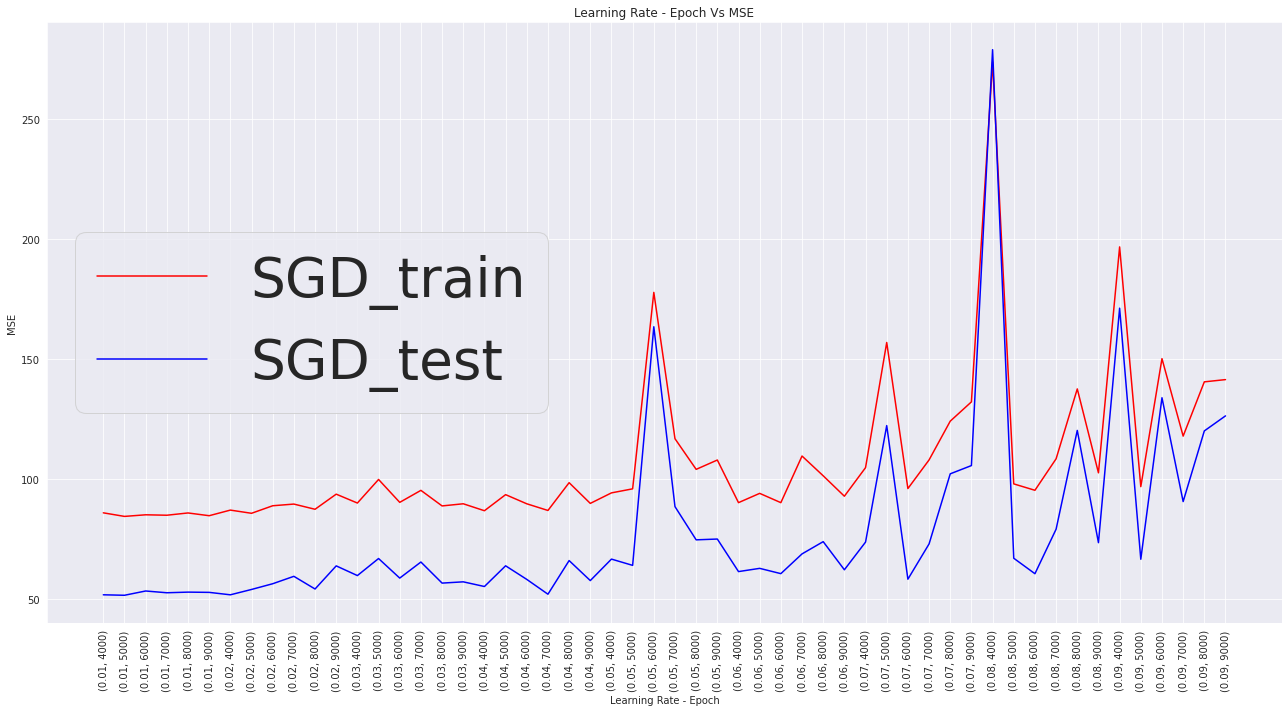

In [ ]:
sns.set_style("darkgrid")

plt.figure(figsize=(18,10))
plt.plot(np.arange(len(learning_rate) * len(epochs)),list(train_mse.values()), color="red",label="SGD_train")
plt.plot(np.arange(len(learning_rate) * len(epochs)),list(test_mse.values()), color="blue", label="SGD_test")

plt.xticks(np.arange(len(learning_rate) * len(epochs)),labels=train_mse.keys(),rotation ='vertical')

plt.title("Learning Rate - Epoch Vs MSE")


plt.xlabel("Learning Rate - Epoch")
plt.ylabel("MSE")
plt.legend(loc="center left", fontsize=55)

plt.tight_layout()
plt.draw()